In [99]:
print(top_affiliations[['affiliation','count']].to_markdown(index=False))

| affiliation                                                                                                                             |   count |
|:----------------------------------------------------------------------------------------------------------------------------------------|--------:|
| Department of Biochemistry, University of Washington, Seattle, WA, USA.                                                                 |      40 |
| MRC Laboratory of Molecular Biology, Cambridge, UK.                                                                                     |      29 |
| Department of Structural Biology, Van Andel Institute, Grand Rapids, MI, USA.                                                           |      20 |
| Department of Molecular and Cellular Physiology, Stanford University School of Medicine, Stanford, CA, USA.                             |      20 |
| Department of Biochemistry, University of Zurich, Zurich, Switzerland.                            

In [67]:
#Change working directory to the task folder
import os
os.chdir("C:/Users/amydu/OneDrive/Documents/EMBL-EBI_Interview_Task")

#Create Output directory if it doesn't exist
if not os.path.exists("output"):
    os.makedirs("output")           
#Create Figures directory if it doesn't exist
if not os.path.exists("output/figures"):
    os.makedirs("output/figures")

In [68]:
#import necessary libraries
import pandas as pd
import ast
from pyvis.network import Network
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

In [69]:
#import metadata for statistical analysis and visualisation
metadata = pd.read_csv("data/epmc_metadata.csv")
authors = pd.read_csv("data/epmc_authors.csv")

In [70]:
metadata.head()

,pmid,title,authors,affiliation,journal,journal_nlmid,year,open_access,doi,abstract,Cited_by
0,40627497,Broadly neutralizing antibodies targeting a co...,"Song G, Yuan M, Liu H, Capozzola T, Lin RN, To...","Department of Immunology and Microbiology, The...",Cell reports,101573691,2025,N,10.1016/j.celrep.2025.115948,Developing broad coronavirus vaccines hinges o...,0
1,40587479,Crystal structures of Mycobacterium tuberculos...,"Fenwick MK, DeRocher AE, Craig JK, Harmon EK, ...",Seattle Structural Genomics Center for Infecti...,PloS one,101285081,2025,Y,10.1371/journal.pone.0326500,Glycyl tRNA synthetases (GlyRSs) are prospecti...,0
2,40555806,A small-molecule VHL molecular glue degrader f...,"Tutter A, Buckley D, Golosov AA, Ma X, Shu W, ...","Discovery Sciences, Novartis Biomedical Resear...",Nature chemical biology,101231976,2025,N,10.1038/s41589-025-01936-x,The von Hippel-Lindau tumor suppressor gene pr...,0
3,40518797,Discovery and Crystallography Study of Novel R...,"Yang Z, Yang P, Xu J, Yang X, Zhou J, He H, Li...",Guangdong Provincial Key Laboratory of New Dru...,Journal of medicinal chemistry,9716531,2025,N,10.1021/acs.jmedchem.5c00344,Current studies on PD-1/PD-L1 small-molecule i...,0
4,40527184,Natural modulators of abscisic acid Signaling:...,"Merino J, Rivera-Moreno M, Bono M, Núñez-Villa...","Instituto de Química-Física ""Blas Cabrera"" (IQ...",Plant physiology and biochemistry : PPB,9882449,2025,N,10.1016/j.plaphy.2025.110155,The phytohormone abscisic acid (ABA) plays a p...,0


In [71]:
authors.head()

,pmid,title,author_fullName,author_orcid
0,40627497,Broadly neutralizing antibodies targeting a co...,Song G,NaN
1,40627497,Broadly neutralizing antibodies targeting a co...,Yuan M,NaN
2,40627497,Broadly neutralizing antibodies targeting a co...,Liu H,NaN
3,40627497,Broadly neutralizing antibodies targeting a co...,Capozzola T,NaN
4,40627497,Broadly neutralizing antibodies targeting a co...,Lin RN,NaN


In [72]:
# look at stats for number of authors per publication
authors.groupby('pmid').size().describe()

#mean of 10 authors for each publication
#min of 1 author, max of 213 authors

count    19457.000000
mean        10.808963
std          7.870413
min          1.000000
25%          6.000000
50%          9.000000
75%         13.000000
max        213.000000
dtype: float64

In [73]:
### Find Top Publishing Authors ###

# Group by Author Name
grouped = authors.groupby('author_fullName')

# Count publications per ORCID
author_counts = grouped.size().reset_index(name='publication_count')

# Sort and select top N
top_authors = author_counts.sort_values('publication_count', ascending=False).head(10)

print(top_authors)
# This outputs the top 10 authors by publication count and full name
# However, we need a way to identify these authors uniquely, as the same author may have the same name.
# We can use ORCID IDs to uniquely identify authors, but not all authors have ORCIDs.

      author_fullName  publication_count
79237         Zhang Y                686
74805          Wang Y                630
40314            Li Y                451
74710          Wang J                431
40236            Li J                420
79225         Zhang X                417
74794          Wang X                390
11493          Chen Y                382
41167           Liu Y                354
79164         Zhang J                341


In [74]:
### Find Top Publishing Authors Based on Valid ORCID ###

# Drop authors with no ORCID
authors_valid = authors.dropna(subset=['author_orcid'])

# Group by ORCID
grouped = authors.groupby('author_orcid')

# Count publications per ORCID
author_counts = grouped.size().reset_index(name='publication_count')

# Get one representative name for each ORCID (first name seen)
author_names = grouped['author_fullName'].first().reset_index()

# Merge counts with names
top_authors = pd.merge(author_counts, author_names, on='author_orcid')

# Sort and select top N
top_authors = top_authors.sort_values('publication_count', ascending=False)

top_10_authors = top_authors.head(10).copy()

# Optional: format label for display
top_10_authors['label'] = top_10_authors.apply(
    lambda row: f"{row['author_fullName']} ({row['author_orcid']})", axis=1
)

In [75]:
print("Top 10 Authors by Publication Count with vaild ORCIDs:")
print(top_10_authors[['label', 'publication_count']])
#Save the top authors to a CSV file
top_10_authors.to_csv("output/top_10_authors.csv", index=False)

Top 10 Authors by Publication Count with vaild ORCIDs:
                                   label  publication_count
25347        Xu HE (0000-0002-6829-8144)                 78
6227       Baker D (0000-0001-7896-6217)                 73
2167       Knapp S (0000-0001-5995-6494)                 67
19132       Gao GF (0000-0002-3869-615X)                 67
4680       Ward AB (0000-0001-7153-3769)                 54
41012   Supuran CT (0000-0003-4262-0323)                 52
24611    Wilson IA (0000-0002-6469-2419)                 49
35849     Nureki O (0000-0003-1813-7008)                 46
15137   Rossjohn J (0000-0002-2020-7522)                 46
40445  McLellan JS (0000-0003-3991-542X)                 46


In [76]:
print(f"Total number of authors: {len(authors)}")
authors['author_orcid'] = authors['author_orcid'].fillna("no_orcid")
print(f"Number of Unique Authors with ORCID: {authors['author_orcid'].nunique()}")
orcid_coverage = authors['author_orcid'].apply(lambda x: x != "no_orcid").mean()
orcid_percentage = round(orcid_coverage * 100, 2)
print(f"ORCID coverage: {orcid_percentage}%")

Total number of authors: 210310
Number of Unique Authors with ORCID: 45794
ORCID coverage: 44.4%


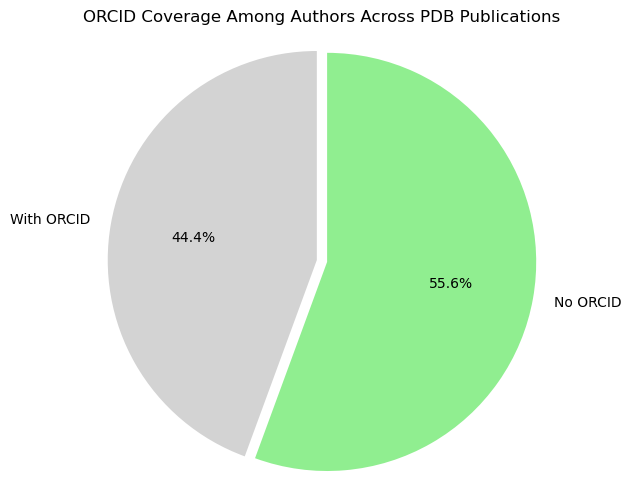

In [77]:
orcid_data = {
    'With ORCID': orcid_percentage ,
    'No ORCID': 100 - orcid_percentage
}

# Create pie chart
plt.figure(figsize=(7, 6))
plt.pie(
    orcid_data.values(),
    labels=orcid_data.keys(),
    colors=["lightgrey"  , "lightgreen"],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.05, 0),
)
plt.title('ORCID Coverage Among Authors Across PDB Publications')
plt.axis('equal')
plt.savefig("output/figures/orcid_coverage_pie_chart.png")
plt.show()

In [78]:
#Approximately 44.4% of authors had ORCID identifiers, enabling disambiguation and reliable counting. 
#The remaining 55.6% lacked ORCIDs, often leading to ambiguous high-frequency names like “Kim E” being grouped together, 
#which may overinflate their contribution.

In [79]:
from pyvis.network import Network
import pandas as pd
from itertools import combinations
import networkx as nx

### Build Co-Author Network ###
# nodes are authors, edges are co-authorships
# node size based on publication count
# edge weight based on co-authorship frequency

# Step 1: Prepare data
authors_filtered = authors[authors["author_orcid"] != "no_orcid"].copy()
authors_filtered["author_id"] = authors_filtered["author_orcid"]

# Step 2: Count publications per author
author_counts = authors_filtered["author_id"].value_counts()
top_authors_list = author_counts.head(200).index.tolist()  # Adjust N as needed

# Step 3: Build graph
G = nx.Graph()
grouped = authors_filtered.groupby("pmid")

for _, group in grouped:
    coauthors = list(set(group["author_id"]))
    for a1, a2 in combinations(coauthors, 2):
        if G.has_edge(a1, a2):
            G[a1][a2]["weight"] += 1
        else:
            G.add_edge(a1, a2, weight=1)

# Step 4: Filter subgraph to top authors
G_sub = G.subgraph(top_authors_list).copy()

# enrich with names for display
author_id_to_name = dict(zip(authors_filtered["author_id"], authors_filtered["author_fullName"]))

# Step 5: Visualize using Pyvis
net = Network(height="600px", width="1000px", notebook=True)
net.from_nx(G_sub)

# Add labels to nodes
for node in net.nodes:
    author_id = node["id"]
    name = author_id_to_name.get(author_id, "Unknown")
    pub_count = int(author_counts.get(author_id, 0))
    node["title"] = f"{name}<br>ORCID: {author_id}<br>Publications: {pub_count}"
    node["label"] = name
    node["value"] = pub_count
    node["font"] = {"size": 20}

net.show("output/figures/author_collab_network.html")
#download html and view in browser

output/figures/author_collab_network.html


In [80]:
### Find Top Collaborations ###

# Step 1: Extract edge weights into a DataFrame
top_edges = [
    (u, v, data["weight"])
    for u, v, data in G.edges(data=True)
    if "weight" in data
]

collab_df = pd.DataFrame(top_edges, columns=["Author1", "Author2", "Publications"])

# Step 4: Remove rows with missing names
collab_df = collab_df.dropna(subset=["Author1", "Author2"])


# Step 2: Sort by number of shared publications
collab_df = collab_df.sort_values(by="Publications", ascending=False)

# Step 3: Optional – map ORCID to names if available
collab_df["Author1_Name"] = collab_df["Author1"].map(author_id_to_name)
collab_df["Author2_Name"] = collab_df["Author2"].map(author_id_to_name)

# Step 4: View or save
top_n = 10
print("Top 10 Collaborations by Publication Count with vaild ORCIDs:")
print(collab_df[["Author1_Name", "Author2_Name", "Publications"]].head(top_n))
# Save to CSV
collab_df.to_csv("output/top_10_collaborations.csv", index=False)

Top 10 Collaborations by Publication Count with vaild ORCIDs:
      Author1_Name Author2_Name  Publications
23628   Supuran CT     Angeli A            36
46160       Gao GF         Qi J            33
44559       Yang D      Wang MW            32
2860       Baker D      Bera AK            32
5042    Steyaert J     Pardon E            32
42890        Xu HE         He X            31
42875        Xu HE      Jiang Y            28
31359     Aihara H        Shi K            24
43085        Mao C      Zhang Y            22
9915    Chaikuad A      Knapp S            22


In [81]:
top_affiliations = metadata['affiliation'].value_counts().head(10)
print("Top 10 Affiliations by Publication Count:")
print(top_affiliations)
#Convert to DataFrame for easier manipulation
top_affiliations = top_affiliations.reset_index()
top_affiliations.columns = ['affiliation', 'count']
#Save top affiliations to a CSV file
top_affiliations.to_csv("output/top_10_affiliations.csv", index=False)

Top 10 Affiliations by Publication Count:
affiliation
Department of Biochemistry, University of Washington, Seattle, WA, USA.                                                                    40
MRC Laboratory of Molecular Biology, Cambridge, UK.                                                                                        29
Department of Structural Biology, Van Andel Institute, Grand Rapids, MI, USA.                                                              20
Department of Molecular and Cellular Physiology, Stanford University School of Medicine, Stanford, CA, USA.                                20
Department of Biochemistry, University of Zurich, Zurich, Switzerland.                                                                     19
Vaccine Research Center, National Institute of Allergy and Infectious Diseases, National Institutes of Health, Bethesda, MD 20892, USA.    18
Department of Biochemistry and Molecular Biophysics, Columbia University, New York, NY, USA.  

In [82]:
# look at stats for number of articles per affiliation
metadata.groupby('affiliation').size().describe()
# count = number of unique affiliations (15726)
# mostly one affiliation per article, with a maximum of 40 articles for a single affiliation
# this may be because of the way affiliations are recorded, as some articles have multiple affiliations
# additionally, there may be spelling errors or variations in how affiliations are recorded, leading to multiple entries for the same institution

count    15726.000000
mean         1.230319
std          0.938686
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         40.000000
dtype: float64

In [83]:
top_journals = metadata['journal'].value_counts().head(10)
print("Top 10 Journals by Publication Count:")
print(top_journals)
#Convert to DataFrame for easier manipulation
top_journals = top_journals.reset_index()
top_journals.columns = ['journal', 'count']
#Save top journals to a CSV file
top_journals.to_csv("output/top_10_journals.csv", index=False)

Top 10 Journals by Publication Count:
journal
Nature communications                                                              2440
Proceedings of the National Academy of Sciences of the United States of America     897
Journal of medicinal chemistry                                                      862
The Journal of biological chemistry                                                 749
Nature                                                                              623
Nucleic acids research                                                              568
Science advances                                                                    460
Nature structural & molecular biology                                               434
Structure (London, England : 1993)                                                  424
Science (New York, N.Y.)                                                            371
Name: count, dtype: int64


In [84]:
# look at stats for number of articles per unqiue journal ID
metadata.groupby('journal_nlmid').size().describe()
# count = number of unique journal ids
# mean = average number of articles per journal ID etc
# std = 126 - high standard deviation indicates some journals have many more articles than others

count     664.000000
mean       29.302711
std       126.407957
min         1.000000
25%         1.000000
50%         3.000000
75%         9.250000
max      2440.000000
dtype: float64

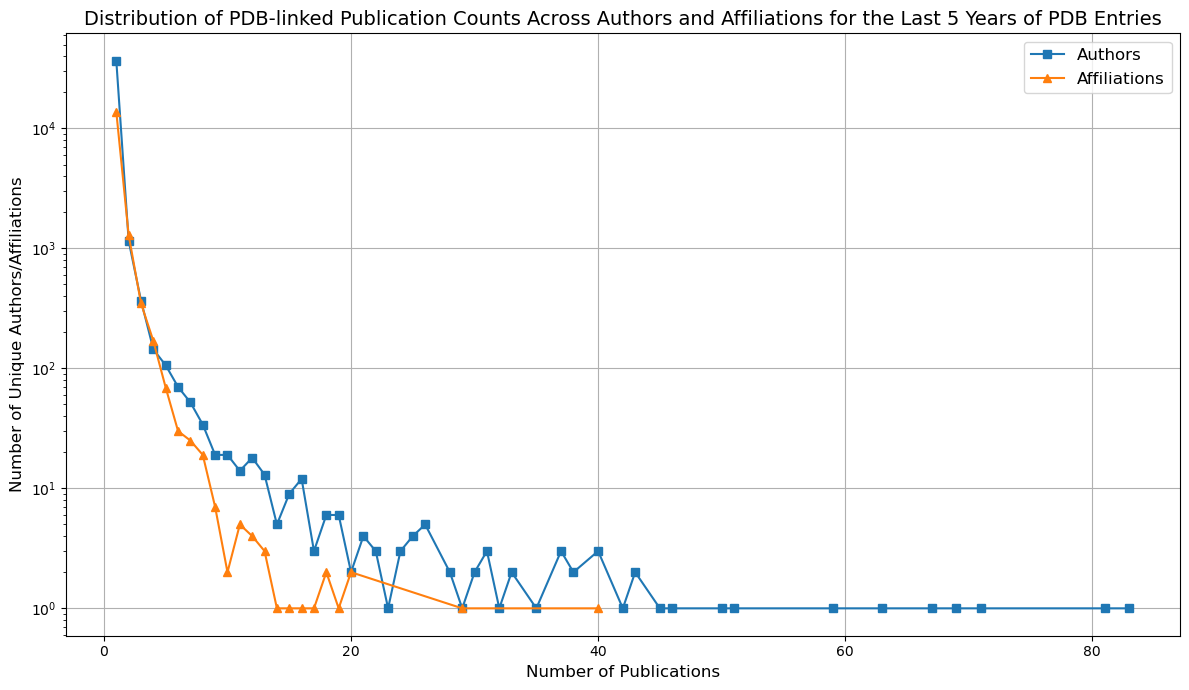

In [85]:
### Plot Distribution of Publication Counts Across Authors and Affiliations ###

#Calculate distribution of publication counts across authors and affiliations
author_distribution = top_authors['author_fullName'].value_counts().value_counts().sort_index()
affil_distribution = metadata['affiliation'].value_counts().value_counts().sort_index()

#Plot 
plt.figure(figsize=(12, 7))
plt.plot(author_distribution.index, author_distribution.values, label='Authors', marker='s')
plt.plot(affil_distribution.index, affil_distribution.values, label='Affiliations', marker='^')
plt.xlabel('Number of Publications', fontsize=12)
plt.ylabel('Number of Unique Authors/Affiliations', fontsize=12)
plt.title('Distribution of PDB-linked Publication Counts Across Authors and Affiliations for the Last 5 Years of PDB Entries', fontsize=14)
plt.yscale('log')  # Often helpful since data is skewed
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("output/figures/publications_distribution_lineplot.png", dpi=300)
plt.show()


In [86]:
### Analyse Publication Trends in ePMC data ###

# Calculate articles per year
articles_per_year = metadata.groupby('year').size()
# Calculate growth rate
growth_rate = articles_per_year.pct_change() * 100  # % growth

print(articles_per_year.head())
print(articles_per_year.tail())
# Earliest publications in the dataset are from 1950, latest from 2025
# Early publications are from historical papers still cited in recent PDB entries (last 5 years)
# Significant spike in publication growth in the last 5 years, corresponding to PDB entries filter
# No significant publication growth in last 5 years, indicating a stable publication rate
# Dip in 2025 because the dataset is not complete for that year yet, as it is still ongoing

year
1950    1
1978    1
1980    1
1981    1
1982    1
dtype: int64
year
2021    3578
2022    3865
2023    3809
2024    3845
2025    2125
dtype: int64


In [ ]:
# Filter for recent years (2010 onwards) for better visualisation
recent_articles_per_year = articles_per_year[articles_per_year.index >= 2010]
recent_growth_rate = growth_rate[growth_rate.index >= 2010]

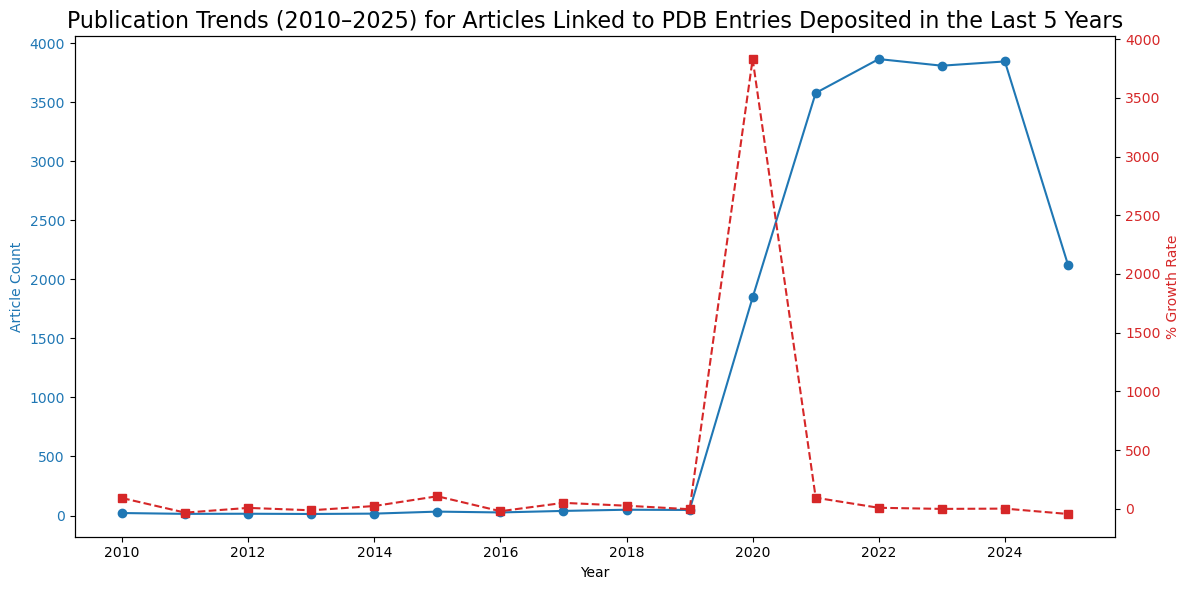

In [104]:
# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary Y-axis: Number of articles
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Article Count', color=color)
ax1.plot(recent_articles_per_year.index, recent_articles_per_year.values, marker='o', color=color, label='Articles')
ax1.tick_params(axis='y', labelcolor=color)

# Secondary Y-axis: Growth rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('% Growth Rate', color=color)
ax2.plot(recent_growth_rate.index, recent_growth_rate.values, marker='s', linestyle='--', color=color, label='Growth Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title('Publication Trends (2010–2025) for Articles Linked to PDB Entries Deposited in the Last 5 Years', fontsize=16)
fig.tight_layout()
plt.savefig("output/figures/pdbe_article_growth.png")
plt.show()

In [88]:
### Analyse ePDB Entries Trends ###
pdb_data = pd.read_csv("data/parsed_pdb_entries.csv")
pdb_data['year'] = pdb_data['fields.creation_date'].apply(lambda x: str(ast.literal_eval(x)[0])[:4])
pdb_data.head()

,acc,id,source,fields.id,fields.description,fields.PUBMED,fields.acc,fields.domain_source,fields.name,fields.creation_date,year
0,7l5l,7l5l,pdbe,['7l5l'],['FLUORESCENT PROTEIN x-ray diffraction entry ...,['34748541'],['7l5l'],['pdbe'],['Crystal structure of the DiB-RM protein'],['20201222'],2020
1,7l1w,7l1w,pdbe,['7l1w'],['HYDROLASE x-ray diffraction entry at resolut...,['34232504'],['7l1w'],['pdbe'],['Unlocking the structural features for the ex...,['20201215'],2020
2,7kz9,7kz9,pdbe,['7kz9'],['TRANSPORT PROTEIN x-ray diffraction entry at...,['33649224'],['7kz9'],['pdbe'],['Crystal structure of Pseudomonas sp. PDC86 s...,['20201210'],2020
3,7ktu,7ktu,pdbe,['7ktu'],['CELL ADHESION electron microscopy entry at r...,['33440717'],['7ktu'],['pdbe'],"[""Cryogenic electron microscopy model of full-...",['20201124'],2020
4,7kqj,7kqj,pdbe,['7kqj'],['TRANSCRIPTION/Agonist x-ray diffraction entr...,['33591748'],['7kqj'],['pdbe'],['CRYSTAL STRUCTURE OF RAR-RELATED ORPHAN RECE...,['20201116'],2020


In [89]:
### Analyse Trends in ePDB Entries ###

# Calculate entries per year
pdb_per_year = pdb_data.groupby('year').size()

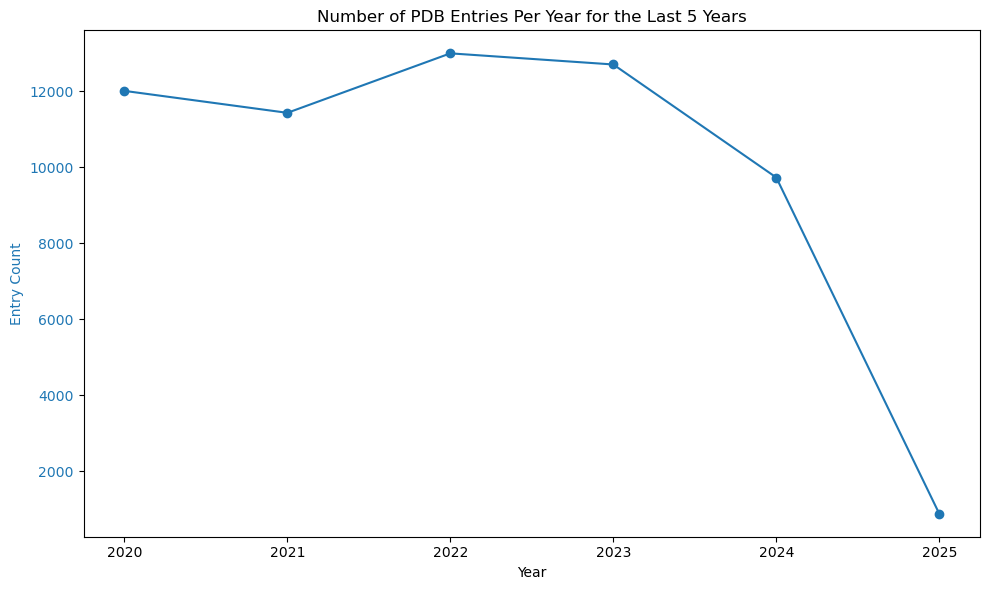

In [90]:
# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary Y-axis: Number of articles
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Entry Count', color=color)
ax1.plot(pdb_per_year.index, pdb_per_year.values, marker='o', color=color, label='Articles')
ax1.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title('Number of PDB Entries Per Year for the Last 5 Years')
fig.tight_layout()
plt.savefig("output/figures/pdbe_entries_rate_per_year.png")
plt.show()